#**Importing Libraries**

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# **Load the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("mental_health_reddit_posts.csv")

# **Sentiment Analysis**

In [ ]:


# Sentiment Analysis using TextBlob
def classify_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity < -0.05:
        return 'Negative'
    elif analysis.sentiment.polarity > 0.05:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment'] = df['preprocessed_content'].apply(classify_sentiment)



# **Risk Level Categorization**

In [ ]:
# Risk Level Categorization
high_risk_terms = [
    'suicide', 'suicidal', 'kill myself', 'end it all',
    'don\'t want to live', 'no reason to live', 'want to die',
    'taking my life', 'self harm', 'overdose', 'hopeless',
    'end my life', 'die', 'harm myself', 'cutting', 'overdosing'
]

moderate_keywords = [
    'help', 'struggling', 'advice', 'support', 'lost',
    'anxiety', 'depressed', 'stress', 'coping', 'therapy',
    'mental health', 'feel', 'need help', 'lately', 'hard time',
    'overwhelmed'
]

# High-risk detection
high_risk_vectorizer = TfidfVectorizer(vocabulary=high_risk_terms, ngram_range=(1, 2))
high_risk_features = high_risk_vectorizer.fit_transform(df['preprocessed_content'])
df['high_risk_flag'] = (high_risk_features.sum(axis=1) > 0).astype(bool)

# Moderate concern detection
moderate_vectorizer = TfidfVectorizer(vocabulary=moderate_keywords, ngram_range=(1, 2))
moderate_features = moderate_vectorizer.fit_transform(df['preprocessed_content'])
df['moderate_flag'] = (moderate_features.sum(axis=1) > 0).astype(bool)

# Assign risk levels
df['risk_level'] = np.where(
    df['high_risk_flag'],
    'High-Risk Concern',
    np.where(
        df['moderate_flag'],
        'Moderate Concern',
        'Low Concern'
    )
)





# **Risk Level Distribution Pie Chart Visualisation**

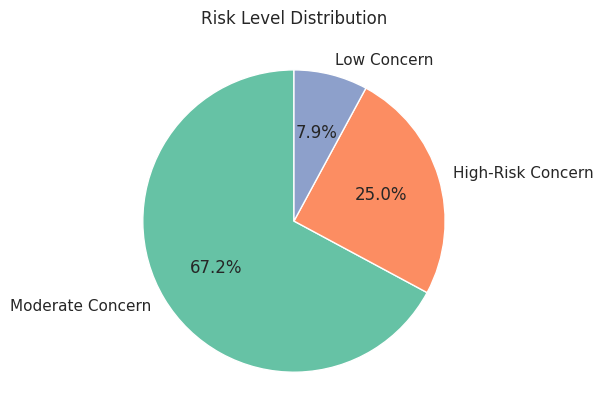

In [ ]:
# 1. Risk Level Distribution Pie Chart
plt.figure(figsize=(6, 6))
sns.set_theme(style="whitegrid")
risk_counts = df['risk_level'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2'))
plt.title('Risk Level Distribution')

plt.tight_layout()
plt.show()


# **Sentiment vs Risk Level Heatmap Visualisation**

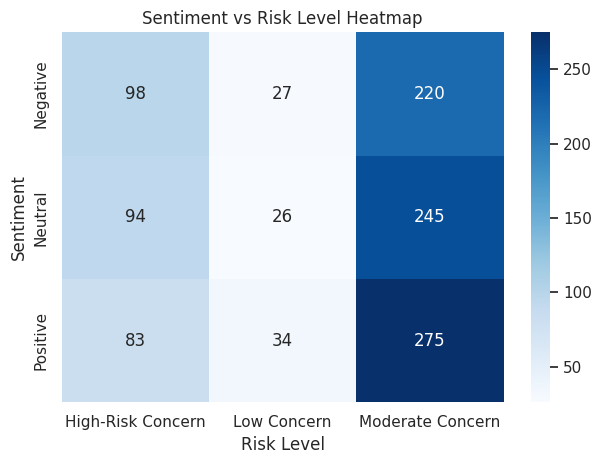

In [ ]:


# 2. Sentiment vs Risk Level Heatmap
contingency_table = pd.crosstab(df['sentiment'], df['risk_level'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Sentiment vs Risk Level Heatmap')
plt.xlabel('Risk Level')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()





# **Sentiment-Risk Distribution Visualisation**

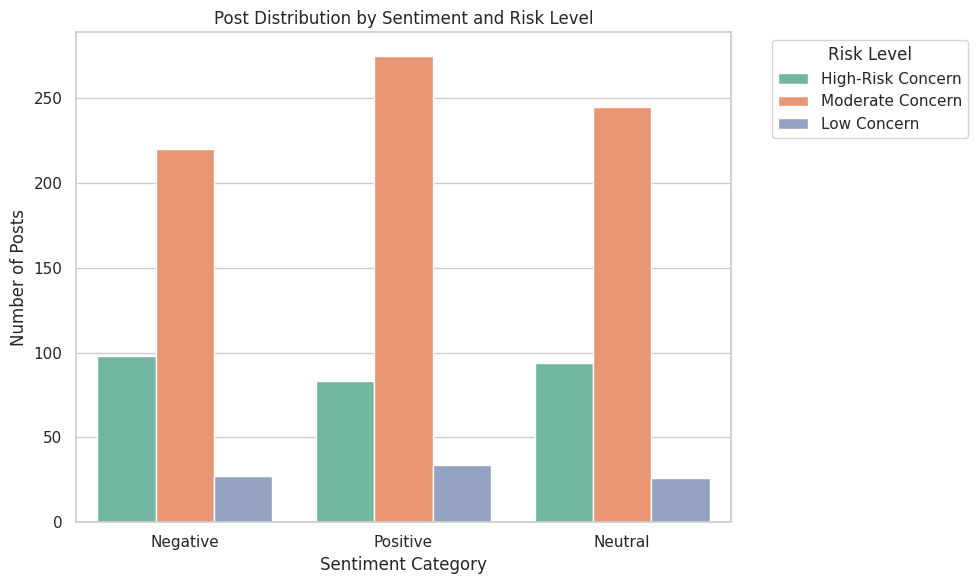

In [ ]:
# 3. Sentiment-Risk Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', hue='risk_level', palette='Set2')
plt.title('Post Distribution by Sentiment and Risk Level')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Posts')
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# **Subreddit Distribution by Risk Level Visualisation**

<Figure size 1000x600 with 0 Axes>

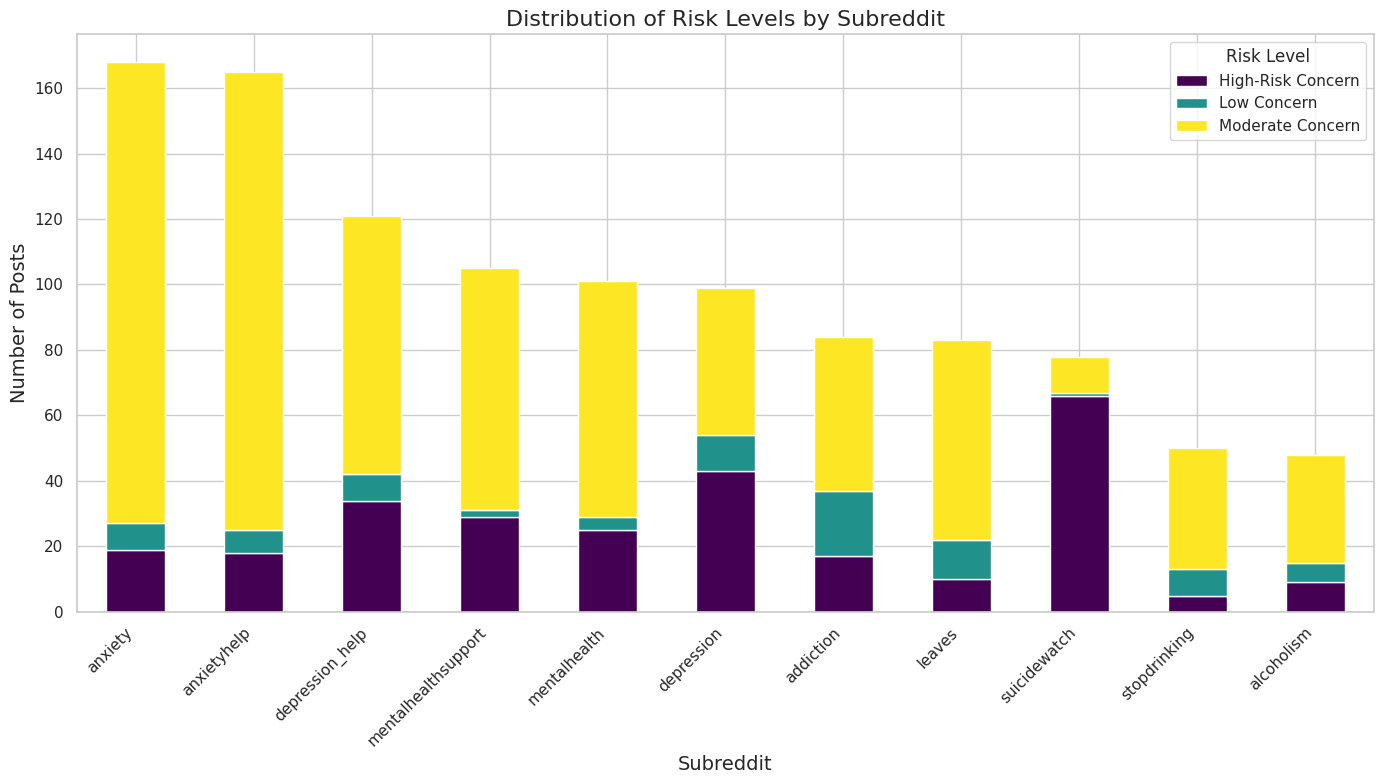

In [ ]:
# 4. Subreddit Distribution by Risk Level
plt.figure(figsize=(10, 6))
subreddit_risk = pd.crosstab(df['subreddit'], df['risk_level'])
subreddit_risk_sorted = subreddit_risk.loc[subreddit_risk.sum(axis=1).sort_values(ascending=False).index]

subreddit_risk_sorted.plot(kind='bar', stacked=True, figsize=(14, 8),
                              colormap='viridis')
plt.title('Distribution of Risk Levels by Subreddit', fontsize=16)
plt.xlabel('Subreddit', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.legend(title='Risk Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()